<a href="https://colab.research.google.com/github/Yogesh-8998/Yogesh-Patil/blob/main/CHD_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
 
%matplotlib inline
 
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 df = pd.read_csv("/content/drive/MyDrive/Almabetter /Machine Learning/Capstone Project /data_cardiovascular_risk.csv")

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.shape

(3390, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
#Missing values
#total percentage of missing data
missing_data = df.isnull().sum()
total_percentage = (missing_data.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [ ]:
 # percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


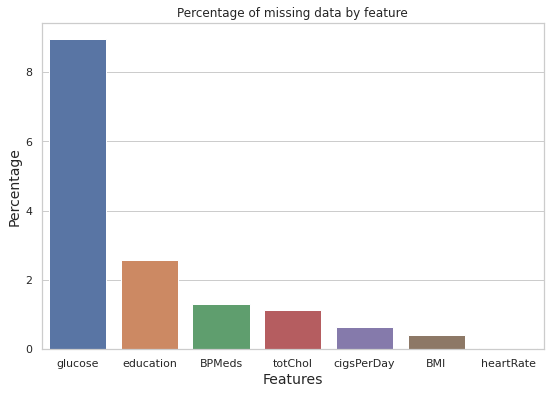

In [ ]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

Glucose level has the highest percentage of missing values i.e 8.96%, remaing have very few missing values. As of total 15.04% missing values we have.

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

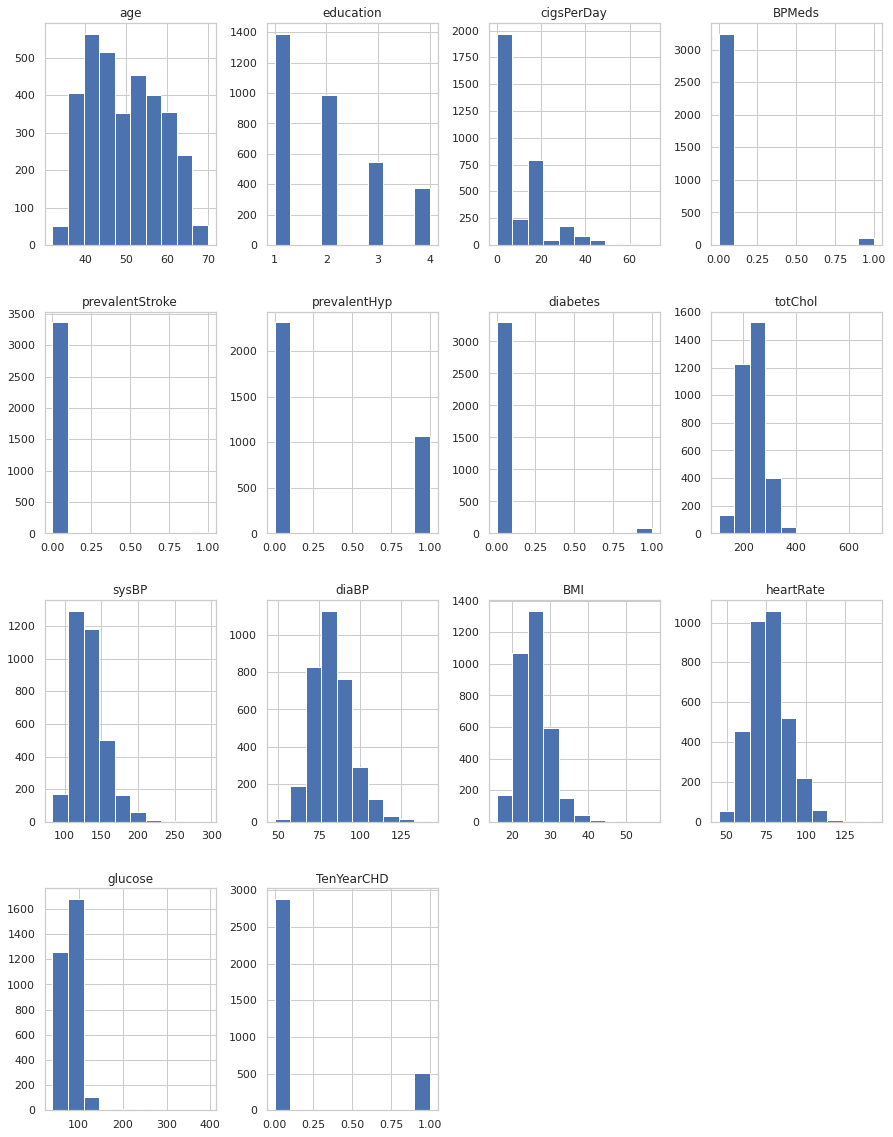

In [ ]:
 # plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

As prevstroke, diabetes and BP meds are too poorly balanced data

Case counts

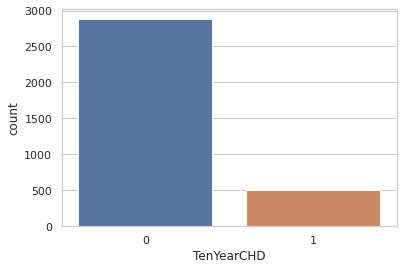

There are 2879 patients without heart disease and 511 patients with the disease


In [ ]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
cases = df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

No. of people disease vs Age

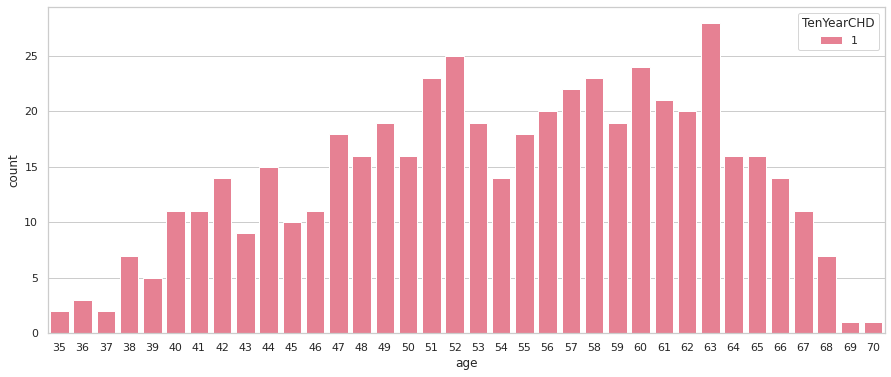

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df[df["TenYearCHD"]==1], hue = 'TenYearCHD',palette='husl')
plt.show()

The People With the highest risk of developing CHD are b/w 51 and 63

Correlation Heatmap

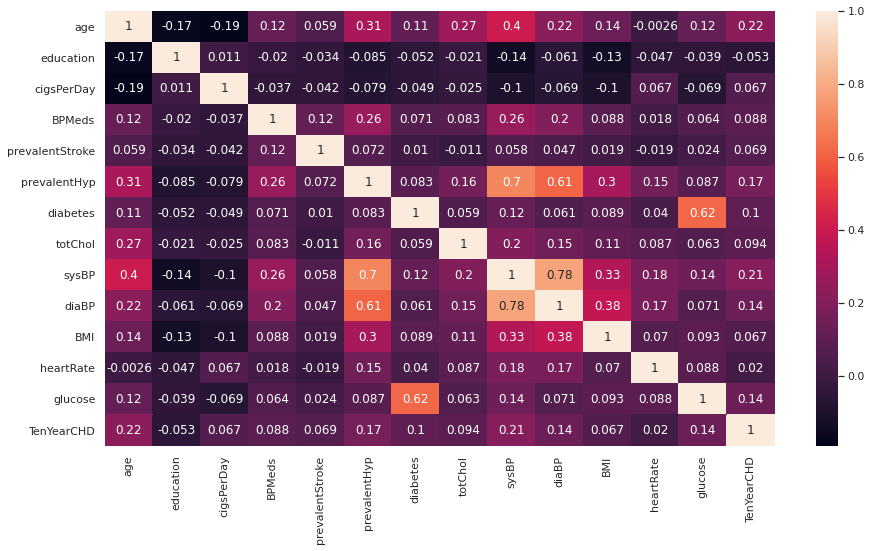

In [ ]:
 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

High Correlation b/w the independant valiables systolic Bp and pevalentHyp, dia BP and pevalent Hyp, glucose and diabetes, systolic BP and Distolic BP

High Correlation b/w Target and independent vars are Age, prevalent Hyp, Systolic BP, glucose, Distolic BP and Diabetes. As if 6 vars are good corelating.

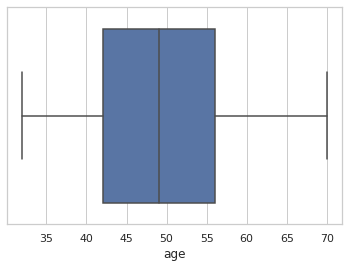

In [ ]:
 
import seaborn as sns
 
sns.boxplot(df['age'])

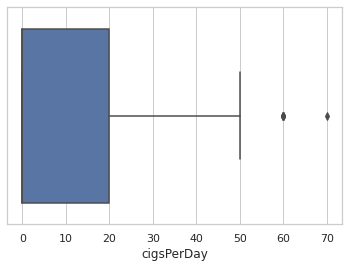

In [ ]:
 sns.boxplot(df['cigsPerDay'])

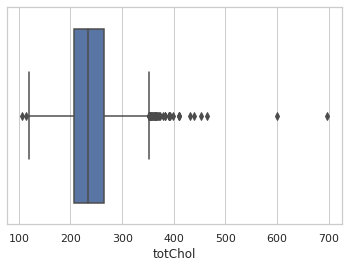

In [ ]:
 sns.boxplot(df['totChol'])

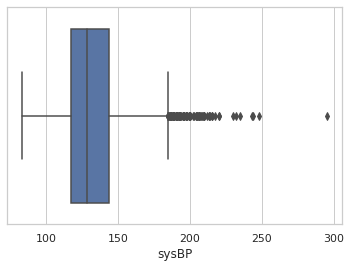

In [ ]:
 sns.boxplot(df['sysBP'])

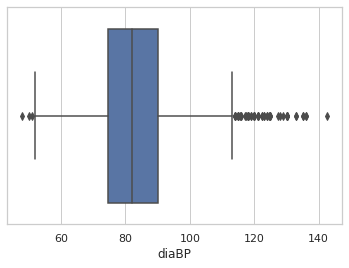

In [ ]:
 sns.boxplot(df['diaBP'])

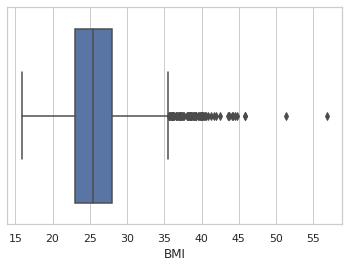

In [ ]:
 sns.boxplot(df['BMI'])

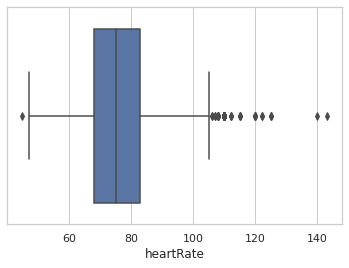

In [ ]:
 sns.boxplot(df['heartRate'])

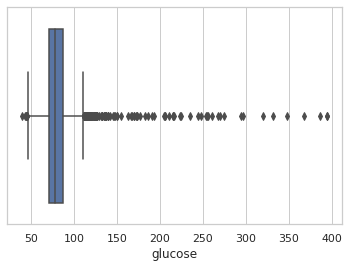

In [ ]:
 sns.boxplot(df['glucose'])

In [ ]:
# Dropping id column
 
df.drop('id', inplace=True, axis=1)

In [ ]:
df_new = df.copy()

In [ ]:
df_new['sex'] = np.where(df.sex=='F', 1, 0)
df_new['is_smoking'] = np.where(df['is_smoking']=='YES', 1, 0)

In [ ]:
df_new.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
print(df_new['cigsPerDay'].head(20))

In [ ]:
df_new['education'].fillna(0,inplace=True)

In [ ]:
#df_new['BPMeds'].fillna(0,inplace=True)

In [ ]:
 df_new['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)

In [ ]:
#df_new['cigsPerDay'].fillna(0,inplace=True)

In [ ]:
 df_new['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

In [ ]:
#df_new['totChol'].fillna(0,inplace=True)

In [ ]:
 df_new['totChol'].fillna(df['totChol'].median(), inplace=True)

In [ ]:
#df_new['BMI'].fillna(0,inplace=True)

In [ ]:
 df_new['BMI'].fillna(df['BMI'].median(), inplace=True)

In [ ]:
#df_new['glucose'].fillna(0,inplace=True)

In [ ]:
 df_new['glucose'].fillna(df['glucose'].median(), inplace=True)

In [ ]:
#df_new['heartRate'].fillna(0,inplace=True)

In [ ]:
 df_new['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


In [ ]:
df_new.describe()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.920354,0.567257,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.053104,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Creating the dataset with all independent variables
X = df_new.iloc[:,:-1]
 
# Creating the dataset with the dependent variable
Y = df_new.iloc[:,-1]

In [131]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [119]:
standard = StandardScaler()
fit_Transform = standard.fit_transform(X_train)
fit_Transform

array([[-0.18280809, -0.88269662,  0.88357003, ...,  0.77769442,
        -0.7619643 , -0.16319174],
       [-0.18280809, -0.88269662, -1.13177221, ..., -1.09767795,
        -1.35314994,  0.00624777],
       [-0.06642885,  0.07370499, -1.13177221, ...,  0.52173809,
        -0.08632357, -0.2479115 ],
       ...,
       [-1.11384195, -0.88269662, -1.13177221, ...,  0.8810614 ,
        -0.17077866,  0.51456631],
       [-1.34660041,  0.07370499,  0.88357003, ...,  0.59311053,
        -0.59305412, -0.2479115 ],
       [-0.53194578,  0.07370499,  0.88357003, ..., -1.01399992,
        -0.08632357, -0.20555162]])

In [123]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
#transform testing dataabs
X_test_norm = norm.transform(X_test)

In [134]:
 from sklearn.preprocessing import StandardScaler
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# numerical features
# num_col = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
#        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
# apply standardization on numerical features

# fit on training data column
scale =  StandardScaler().fit(X_train)    
#transform the training data column
X_train_stand = scale.transform(X_train_stand)
 # transform the test data column
X_test_stand = scale.transform(X_test_stand)

In [137]:
from sklearn.tree import DecisionTreeClassifier
chd_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
chd_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [138]:
y_predicted = chd_classifier.predict(X_test)

In [139]:
y_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [142]:
Y_test[:10]

1841    0
3332    0
1299    1
1280    0
1414    0
698     0
817     0
2495    0
3071    0
320     0
Name: TenYearCHD, dtype: int64

In [144]:
from sklearn.metrics import accuracy_score, auc

accuracy_score(Y_test, y_predicted) * 100

84.66076696165192

In [147]:
df_new.iloc[-1]

age                 54.00
education            3.00
sex                  1.00
is_smoking           0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            288.00
sysBP              124.00
diaBP               77.00
BMI                 29.88
heartRate           79.00
glucose             92.00
TenYearCHD           0.00
Name: 3389, dtype: float64

In [148]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(2712, 15)

 The shape of test dataset :
(678, 15)


In [149]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    2303
1     409
Name: TenYearCHD, dtype: int64

 Distribution of classes of dependent variable in test :
0    576
1    102
Name: TenYearCHD, dtype: int64


In [162]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [163]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [157]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[2303,    0],
       [ 358,   51]])

In [158]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[573,   3],
       [100,   2]])

In [155]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.5623471882640587

In [156]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.5071997549019608

In [165]:
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

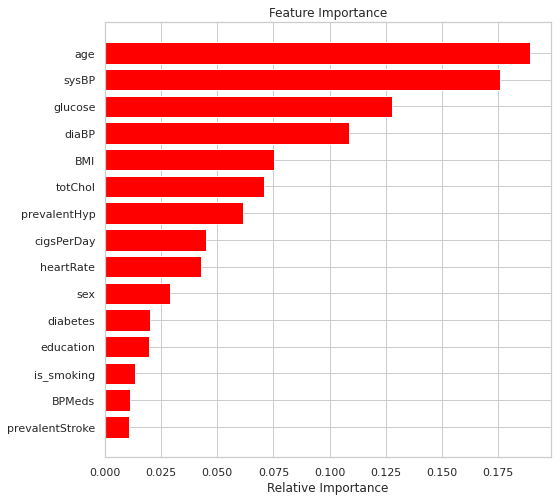

In [166]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()